# Project Titanic: An Analysis

Authors: Justin Ventura & Blaine Mason λ

Date: Thursday, December 17th, 2020.

## Purpose of Analysis:

In order to preserve brevity, we will make just one hypothesis: adult men are more likely to die than women and children.  This is most likely due to the traditional "women and children first" rule when it came to the life boats during evacuation.  It is also probable that most of the workers on board were men, and the workers prioritized everyone else before themselves.  These are reasonable claims, but claims nonetheless.  We would like to show that is indeed the case with actual supporting data.  Then we will use multiple machine learning algorithms to see if they can learn the likelihood of a single individual surviving based on their age, sex, and wealth class (other features are included in the full report).  We have chosen these three as they have the most significant affect on their chances of survival.

** Let us begin. **

In [20]:
###################################################################################################
#                                                                                                 #
#     _____    _                               _____                _                             #
#    (_   _)_ ( )_                _           (  _  )              (_ )               _           #
#      | | (_)| ,_)   _ _   ___  (_)   ___    | (_) |  ___     _ _  | |  _   _   ___ (_)  ___     #
#      | | | || |   /'_` )/' _ `\| | /'___)   |  _  |/' _ `\ /'_` ) | | ( ) ( )/',__)| |/',__)    #
#      | | | || |_ ( (_| || ( ) || |( (___    | | | || ( ) |( (_| | | | | (_) |\__, \| |\__, \    #
#      (_) (_)`\__)`\__,_)(_) (_)(_)`\____)   (_) (_)(_) (_)`\__,_)(___)`\__, |(____/(_)(____/    #
#                                                                       ( )_| |                   #
#                                                                       `\___/'                   #
#                                                                                                 #
###################################################################################################

# ----------------------------------------------------------------------------------------------- #
import visualizations as vis  # Our visualization library.
import NeuralNetwork as nn
import importlib  # For reloading updated imports.      
import numpy as np
from sklearn.preprocessing import MinMaxScaler
importlib.reload(vis)         # Reload for updates.
titanic_df = vis.load_titanic_dataset()
# ----------------------------------------------------------------------------------------------- #

# Methods for Testing our Hypothesis.

- Describing the Given Data.

- Calculate & Visualize Numerous Statistics.

- Finding and Visualizing Correlation.

- Using Supervised Machine Learning Algorithms.


## Distributions and Explanations:

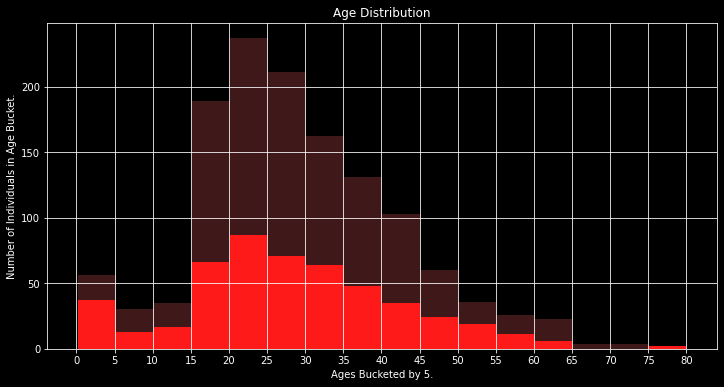

In [10]:
# ----------------------------------------------------------------------------------------------- #
vis.get_age_distributions(titanic_df)  # Plot the age distribution.
# ----------------------------------------------------------------------------------------------- #

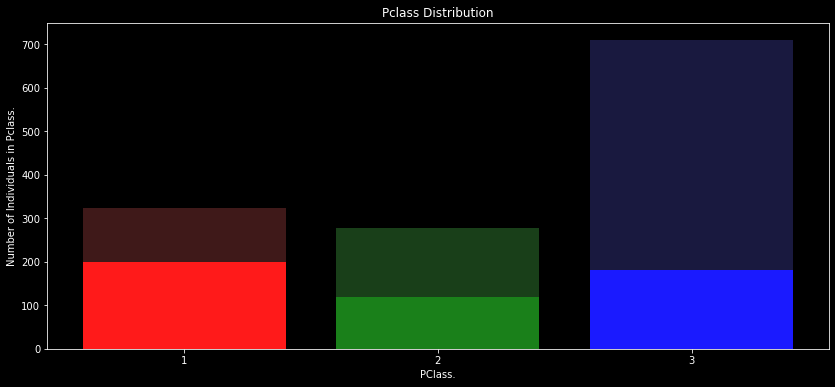

In [11]:
# ----------------------------------------------------------------------------------------------- #
vis.get_pclass_distributions(titanic_df)  # Plot the age distribution.
# ----------------------------------------------------------------------------------------------- #

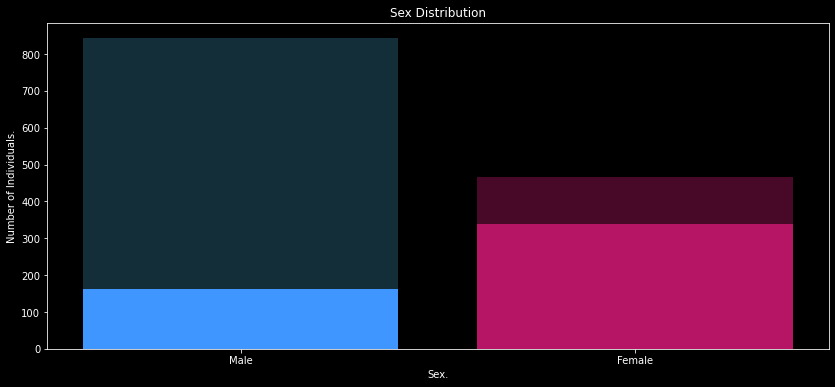

In [12]:
# ----------------------------------------------------------------------------------------------- #
vis.get_sex_distributions(titanic_df)
# ----------------------------------------------------------------------------------------------- #

In [13]:
vis.get_parallel(titanic_df)

In [14]:
vis.sun_plot(titanic_df)

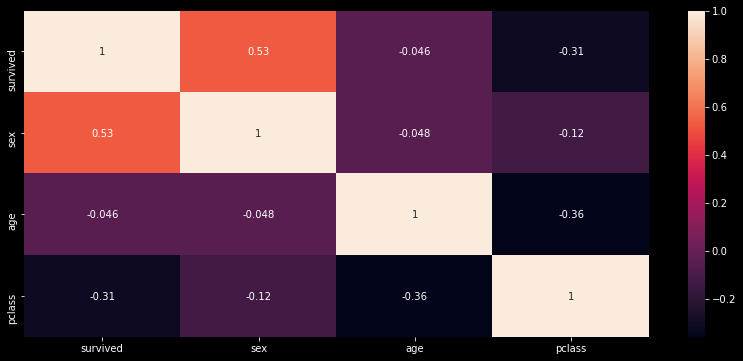

In [21]:
# ----------------------------------------------------------------------------------------------- #
vis.get_correlation_heatmap(titanic_df)
# ----------------------------------------------------------------------------------------------- #

In [16]:
# Using fare instead of pclass to narrow in on the wealth of the passenger
titanic_df_fare = vis.load_titanic_dataset2()

In [19]:
vis.get_parallel2(titanic_df_fare)

In [18]:
temp = titanic_df_fare[['fare']].to_numpy()
for i in range(len(temp)):
    if(temp[i] > 300):
        temp[i] = np.mean(temp)
titanic_df_fare[['fare']] = temp

In [25]:
temp1 = titanic_df[['sex', 'age', 'pclass']]
temp2 = titanic_df[['survived']]
genders = {'male': 0, 'female': 1}
temp1['sex'] = temp1['sex'].map(genders)
xs = temp1.to_numpy()
ys = temp2.to_numpy()
full_set = np.array( [ (x, y) for x, y in zip(xs, ys) ], dtype=object )
def split(n, p, vects):
    np.random.shuffle(vects)
    train_size = int(n*p)
    return vects[:train_size], vects[train_size:]
train, test = split(len(full_set), 0.7, full_set)


<ipython-input-25-1e1aff57f110>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [38]:
NN = nn.Tneural_network(3,2,2)
NN.train_network(train[:,0], train[:,1], 100)

Current loss: [216.90328315]
